In [1]:
# %matplotlib inline

In [2]:
from harissa_benchmark import ScoresGenerator, available_networks, available_inferences
from harissa_benchmark.generators import DatasetsGenerator
from harissa_benchmark.plotter import InteractionPlotter
from harissa.plot import build_pos, plot_network

print(available_networks())
print(available_inferences())

['FN4', 'FN8', 'Trees5', 'Trees10', 'Trees20', 'Trees50', 'Trees100', 'BN8', 'CN5']
['Sincerities', 'Hartree']


In [3]:
gen = ScoresGenerator(datasets_generator=DatasetsGenerator(path='datagen'))

# for name, network in gen.networks_generator.networks.items():
#     print(f'{name}:')
#     plot_network(network.interaction, build_pos(network.interaction))

Loading CN5 datasets |▶▶▶▶▶▶▶             | 🌶      1 in 0s (482.6/s)                               

In [4]:
gen.generate()

Generating scores |                    | 🌶      0/180 [0%] in 0s (~0s, 0.0/s)                       


on 0: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
        model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |                    |  🌶     0/180 [0%] in 0s (~0s, 0.0/s)                       


on 1: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
        model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |▏                   |   🌶    1/180 [1%] in 0s (~13s, 13.5/s)                     


on 2: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
        model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |▎                   |    🌶   2/180 [1%] in 0s (~12s, 15.5/s)                     


on 3: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
        model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |▍                   |     🌶  3/180 [2%] in 0s (~11s, 18.0/s)                     


on 4: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
        model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |▌                   |      🌶 4/180 [2%] in 0s (~10s, 20.6/s)                     


on 5: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
        model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |▌                   |      🌶 5/180 [3%] in 0s (~9s, 23.1/s)                      


on 6: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
        model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |▋                   |     🌶  6/180 [3%] in 0s (~8s, 25.4/s)                      


on 7: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
        model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |▊                   |    🌶   7/180 [4%] in 0s (~7s, 27.2/s)                      


on 8: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
        model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |▉                   |   🌶    8/180 [4%] in 0s (~7s, 28.7/s)                      


on 9: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
        model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█                   |  🌶     9/180 [5%] in 0s (~6s, 30.1/s)                      
on 10: WARNING: a <= 0                                                                              
Generating scores |█▏                  | 🌶      10/180 [6%] in 0s (~6s, 31.6/s)                     
on 10: WARNING: a <= 0                                                                              
Generating scores |█▏                  | 🌶      10/180 [6%] in 0s (~6s, 32.1/s)                     
on 10: WARNING: a <= 0                                                                              
Generating scores |█▏                  |  🌶     10/180 [6%] in 0s (~5s, 32.1/s)                     
on 10: WARNING: a <= 0                                                                              
Generating scores |█▏                  |   🌶    10/180 [6%] in 0s (~5s, 31.6/s)                     
on 10: WARNING: a <= 0                                                                     

on 20: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██▎                 |      🌶 20/180 [11%] in 4s (~32s, 4.9/s)                    


on 21: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██▍                 |      🌶 21/180 [12%] in 4s (~32s, 5.0/s)                    


on 22: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██▌                 |     🌶  22/180 [12%] in 4s (~31s, 5.1/s)                    


on 23: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██▌                 |    🌶   23/180 [13%] in 4s (~31s, 5.3/s)                    


on 24: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██▋                 |   🌶    24/180 [13%] in 4s (~30s, 5.4/s)                    


on 25: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██▊                 |  🌶     25/180 [14%] in 4s (~29s, 5.6/s)                    


on 26: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██▉                 | 🌶      26/180 [14%] in 4s (~28s, 5.8/s)                    


on 27: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███                 | 🌶      27/180 [15%] in 4s (~27s, 6.0/s)                    


on 28: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███▏                |  🌶     28/180 [16%] in 4s (~26s, 6.2/s)                    


on 29: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███▎                |   🌶    29/180 [16%] in 4s (~25s, 6.4/s)                    
on 30: WARNING: a <= 0                                                                              
Generating scores |███▍                |    🌶   30/180 [17%] in 4s (~24s, 6.6/s)                    
on 30: WARNING: a <= 0                                                                              
Generating scores |███▍                |     🌶  30/180 [17%] in 4s (~23s, 6.7/s)                    
Generating scores |███▍                |      🌶 30/180 [17%] in 4s (~23s, 6.7/s)                    
on 31: WARNING: a <= 0                                                                              
Generating scores |███▌                |      🌶 31/180 [17%] in 4s (~22s, 6.7/s)                    
on 31: WARNING: a <= 0                                                                              
Generating scores |███▌                |     🌶  31/180 [17%] in 5s (~22s, 6.8/s)           

on 40: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |████▌               |      🌶 40/180 [22%] in 6s (~20s, 7.0/s)                    


on 41: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |████▌               |     🌶  41/180 [23%] in 6s (~20s, 7.0/s)                    


on 42: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |████▋               |    🌶   42/180 [23%] in 6s (~20s, 7.1/s)                    


on 43: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |████▊               |   🌶    43/180 [24%] in 6s (~20s, 7.1/s)                    


on 44: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |████▉               |  🌶     44/180 [24%] in 6s (~19s, 7.2/s)                    
Generating scores |█████               | 🌶      45/180 [25%] in 6s (~19s, 7.2/s)                    


on 45: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████               | 🌶      45/180 [25%] in 6s (~19s, 7.2/s)                    
Generating scores |█████▏              |  🌶     46/180 [26%] in 6s (~19s, 7.3/s)                    


on 46: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████▏              |   🌶    46/180 [26%] in 6s (~19s, 7.3/s)                    
Generating scores |█████▎              |    🌶   47/180 [26%] in 6s (~18s, 7.3/s)                    


on 47: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████▎              |     🌶  47/180 [26%] in 6s (~18s, 7.3/s)                    
Generating scores |█████▍              |      🌶 48/180 [27%] in 7s (~18s, 7.3/s)                    


on 48: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████▍              |      🌶 48/180 [27%] in 7s (~18s, 7.3/s)                    


on 49: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████▌              |     🌶  49/180 [27%] in 7s (~18s, 7.3/s)                    
on 50: WARNING: a <= 0                                                                              
Generating scores |█████▌              |    🌶   50/180 [28%] in 7s (~18s, 7.4/s)                    
on 50: WARNING: a <= 0                                                                              
Generating scores |█████▌              |   🌶    50/180 [28%] in 7s (~18s, 7.4/s)                    
on 50: WARNING: a <= 0                                                                              
Generating scores |█████▌              |  🌶     50/180 [28%] in 7s (~18s, 7.5/s)                    
on 50: WARNING: a <= 0                                                                              
Generating scores |█████▌              | 🌶      50/180 [28%] in 7s (~17s, 7.5/s)                    
on 50: WARNING: a <= 0                                                                     

on 56: /home/nseyler/Work/harissa/src/harissa/inference/hartree/base.py:174: RuntimeWarning: invalid value encountered in log
         d = n[i]*(np.log(b)-np.log(b+1)-psi(a[i])) + p0


Generating scores |██████▎             |    🌶   56/180 [31%] in 11s (~25s, 5.0/s)                   
on 57: WARNING: a <= 0                                                                              
Generating scores |██████▍             |   🌶    57/180 [32%] in 11s (~25s, 5.0/s)                   
on 57: WARNING: a <= 0                                                                              
Generating scores |██████▍             |  🌶     57/180 [32%] in 11s (~25s, 5.0/s)                   
on 57: WARNING: a <= 0                                                                              
Generating scores |██████▍             | 🌶      57/180 [32%] in 11s (~25s, 5.0/s)                   
on 57: WARNING: a <= 0                                                                              
Generating scores |██████▍             | 🌶      57/180 [32%] in 11s (~24s, 5.0/s)                   
on 57: WARNING: a <= 0                                                                     

on 60: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██████▋             |    🌶   60/180 [33%] in 13s (~26s, 4.6/s)                   


on 61: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██████▊             |     🌶  61/180 [34%] in 13s (~26s, 4.6/s)                   


on 62: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██████▉             |      🌶 62/180 [34%] in 13s (~26s, 4.7/s)                   


on 63: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████             |      🌶 63/180 [35%] in 13s (~25s, 4.7/s)                   


on 64: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████▏            |     🌶  64/180 [36%] in 13s (~25s, 4.8/s)                   


on 65: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████▎            |    🌶   65/180 [36%] in 13s (~24s, 4.8/s)                   


on 66: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████▍            |   🌶    66/180 [37%] in 13s (~24s, 4.9/s)                   


on 67: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████▌            |  🌶     67/180 [37%] in 13s (~23s, 4.9/s)                   


on 68: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████▌            | 🌶      68/180 [38%] in 13s (~23s, 5.0/s)                   


on 69: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████▋            | 🌶      69/180 [38%] in 13s (~22s, 5.0/s)                   
on 70: WARNING: a <= 0                                                                              
Generating scores |███████▊            |  🌶     70/180 [39%] in 13s (~22s, 5.1/s)                   
on 70: WARNING: a <= 0                                                                              
Generating scores |███████▊            |   🌶    70/180 [39%] in 13s (~22s, 5.1/s)                   
on 70: WARNING: a <= 0                                                                              
Generating scores |███████▊            |    🌶   70/180 [39%] in 13s (~21s, 5.2/s)                   
on 70: WARNING: a <= 0                                                                              
Generating scores |███████▊            |     🌶  70/180 [39%] in 13s (~21s, 5.2/s)                   
on 70: WARNING: a <= 0                                                                     

on 80: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |████████▉           |    🌶   80/180 [44%] in 16s (~20s, 5.0/s)                   


on 81: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████████           |     🌶  81/180 [45%] in 16s (~20s, 5.1/s)                   


on 82: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████████▏          |      🌶 82/180 [46%] in 16s (~19s, 5.1/s)                   


on 83: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████████▎          |      🌶 83/180 [46%] in 16s (~19s, 5.1/s)                   


on 84: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████████▍          |     🌶  84/180 [47%] in 16s (~19s, 5.2/s)                   


on 85: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████████▌          |    🌶   85/180 [47%] in 16s (~19s, 5.2/s)                   


on 86: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████████▌          |   🌶    86/180 [48%] in 16s (~18s, 5.3/s)                   


on 87: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████████▋          |  🌶     87/180 [48%] in 16s (~18s, 5.3/s)                   


on 88: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████████▊          | 🌶      88/180 [49%] in 16s (~17s, 5.4/s)                   


on 89: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
         model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████████▉          | 🌶      89/180 [49%] in 16s (~17s, 5.4/s)                   
on 90: WARNING: a <= 0                                                                              
Generating scores |██████████          |  🌶     90/180 [50%] in 16s (~17s, 5.5/s)                   
on 90: WARNING: a <= 0                                                                              
Generating scores |██████████          |   🌶    90/180 [50%] in 16s (~17s, 5.5/s)                   
on 90: WARNING: a <= 0                                                                              
Generating scores |██████████          |    🌶   90/180 [50%] in 16s (~16s, 5.5/s)                   
on 90: WARNING: a <= 0                                                                              
Generating scores |██████████          |     🌶  90/180 [50%] in 16s (~16s, 5.6/s)                   
on 91: WARNING: a <= 0                                                                     

on 100: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████████▏        |      🌶 100/180 [56%] in 18s (~14s, 5.7/s)                  


on 101: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████████▎        |     🌶  101/180 [56%] in 18s (~14s, 5.7/s)                  


on 102: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████████▍        |    🌶   102/180 [57%] in 18s (~14s, 5.7/s)                  


on 103: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████████▌        |   🌶    103/180 [57%] in 18s (~14s, 5.8/s)                  


on 104: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████████▌        |  🌶     104/180 [58%] in 18s (~13s, 5.8/s)                  


on 105: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████████▋        | 🌶      105/180 [58%] in 18s (~13s, 5.9/s)                  


on 106: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████████▊        | 🌶      106/180 [59%] in 18s (~13s, 5.9/s)                  


on 107: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████████▉        |  🌶     107/180 [59%] in 18s (~13s, 5.9/s)                  


on 108: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |████████████        |   🌶    108/180 [60%] in 18s (~12s, 6.0/s)                  


on 109: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |████████████▏       |    🌶   109/180 [61%] in 18s (~12s, 6.0/s)                  
on 110: WARNING: a <= 0                                                                             
Generating scores |████████████▎       |     🌶  110/180 [61%] in 18s (~12s, 6.1/s)                  
on 110: WARNING: a <= 0                                                                             
Generating scores |████████████▎       |      🌶 110/180 [61%] in 18s (~12s, 6.1/s)                  
on 110: WARNING: a <= 0                                                                             
Generating scores |████████████▎       |      🌶 110/180 [61%] in 18s (~12s, 6.1/s)                  
on 110: WARNING: a <= 0                                                                             
Generating scores |████████████▎       |     🌶  110/180 [61%] in 18s (~11s, 6.1/s)                  
on 110: WARNING: a <= 0                                                                    

on 120: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████████████▍      |     🌶  120/180 [67%] in 21s (~10s, 5.9/s)                  
Generating scores |█████████████▌      |      🌶 121/180 [67%] in 21s (~10s, 5.9/s)                  
Generating scores |█████████████▌      |      🌶 121/180 [67%] in 21s (~10s, 5.9/s)                  
Generating scores |█████████████▌      |     🌶  121/180 [67%] in 21s (~10s, 5.8/s)                  
Generating scores |█████████████▌      |    🌶   121/180 [67%] in 21s (~10s, 5.8/s)                  
Generating scores |█████████████▌      |   🌶    121/180 [67%] in 21s (~10s, 5.8/s)                  
Generating scores |█████████████▌      |  🌶     121/180 [67%] in 21s (~10s, 5.7/s)                  
Generating scores |█████████████▌      | 🌶      121/180 [67%] in 22s (~10s, 5.7/s)                  
Generating scores |█████████████▌      | 🌶      121/180 [67%] in 22s (~10s, 5.6/s)                  


on 121: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████████████▌      |  🌶     121/180 [67%] in 22s (~10s, 5.6/s)                  
Generating scores |█████████████▌      |   🌶    122/180 [68%] in 22s (~10s, 5.6/s)                  
Generating scores |█████████████▌      |    🌶   122/180 [68%] in 22s (~10s, 5.6/s)                  
Generating scores |█████████████▌      |     🌶  122/180 [68%] in 22s (~10s, 5.5/s)                  
Generating scores |█████████████▌      |      🌶 122/180 [68%] in 22s (~10s, 5.5/s)                  
Generating scores |█████████████▌      |      🌶 122/180 [68%] in 22s (~11s, 5.5/s)                  
Generating scores |█████████████▌      |     🌶  122/180 [68%] in 23s (~11s, 5.5/s)                  
Generating scores |█████████████▌      |    🌶   122/180 [68%] in 23s (~11s, 5.4/s)                  
Generating scores |█████████████▌      |   🌶    122/180 [68%] in 23s (~11s, 5.4/s)                  


on 122: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████████████▋      |  🌶     123/180 [68%] in 23s (~11s, 5.4/s)                  
Generating scores |█████████████▋      | 🌶      123/180 [68%] in 23s (~11s, 5.4/s)                  
Generating scores |█████████████▋      | 🌶      123/180 [68%] in 23s (~11s, 5.4/s)                  
Generating scores |█████████████▋      |  🌶     123/180 [68%] in 23s (~11s, 5.3/s)                  
Generating scores |█████████████▋      |   🌶    123/180 [68%] in 23s (~11s, 5.3/s)                  
Generating scores |█████████████▋      |    🌶   123/180 [68%] in 24s (~11s, 5.3/s)                  
Generating scores |█████████████▋      |     🌶  123/180 [68%] in 24s (~11s, 5.3/s)                  
Generating scores |█████████████▋      |      🌶 123/180 [68%] in 24s (~11s, 5.2/s)                  
Generating scores |█████████████▋      |      🌶 123/180 [68%] in 24s (~11s, 5.2/s)                  


on 123: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████████████▋      |     🌶  123/180 [68%] in 24s (~11s, 5.2/s)                  
Generating scores |█████████████▊      |    🌶   124/180 [69%] in 24s (~11s, 5.2/s)                  
Generating scores |█████████████▊      |   🌶    124/180 [69%] in 24s (~11s, 5.1/s)                  
Generating scores |█████████████▊      |  🌶     124/180 [69%] in 24s (~11s, 5.1/s)                  
Generating scores |█████████████▊      | 🌶      124/180 [69%] in 25s (~11s, 5.1/s)                  
Generating scores |█████████████▊      | 🌶      124/180 [69%] in 25s (~11s, 5.1/s)                  
Generating scores |█████████████▊      |  🌶     124/180 [69%] in 25s (~11s, 5.1/s)                  
Generating scores |█████████████▊      |   🌶    124/180 [69%] in 25s (~11s, 5.0/s)                  
Generating scores |█████████████▊      |    🌶   124/180 [69%] in 25s (~11s, 5.0/s)                  


on 124: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████████████▊      |     🌶  124/180 [69%] in 25s (~11s, 5.0/s)                  
Generating scores |█████████████▉      |      🌶 125/180 [69%] in 25s (~11s, 5.0/s)                  
Generating scores |█████████████▉      |      🌶 125/180 [69%] in 26s (~11s, 4.9/s)                  
Generating scores |█████████████▉      |     🌶  125/180 [69%] in 26s (~11s, 4.9/s)                  
Generating scores |█████████████▉      |    🌶   125/180 [69%] in 26s (~11s, 4.9/s)                  
Generating scores |█████████████▉      |   🌶    125/180 [69%] in 26s (~11s, 4.9/s)                  
Generating scores |█████████████▉      |  🌶     125/180 [69%] in 26s (~11s, 4.8/s)                  
Generating scores |█████████████▉      | 🌶      125/180 [69%] in 26s (~11s, 4.8/s)                  


on 125: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████████████▉      | 🌶      125/180 [69%] in 26s (~11s, 4.8/s)                  
Generating scores |██████████████      |  🌶     126/180 [70%] in 27s (~11s, 4.8/s)                  
Generating scores |██████████████      |   🌶    126/180 [70%] in 27s (~11s, 4.8/s)                  
Generating scores |██████████████      |    🌶   126/180 [70%] in 27s (~11s, 4.7/s)                  
Generating scores |██████████████      |     🌶  126/180 [70%] in 27s (~11s, 4.7/s)                  
Generating scores |██████████████      |      🌶 126/180 [70%] in 27s (~11s, 4.7/s)                  
Generating scores |██████████████      |      🌶 126/180 [70%] in 27s (~11s, 4.7/s)                  
Generating scores |██████████████      |     🌶  126/180 [70%] in 27s (~12s, 4.7/s)                  
Generating scores |██████████████      |    🌶   126/180 [70%] in 27s (~12s, 4.6/s)                  


on 126: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██████████████      |   🌶    126/180 [70%] in 28s (~12s, 4.6/s)                  
Generating scores |██████████████▏     |  🌶     127/180 [71%] in 28s (~12s, 4.6/s)                  
Generating scores |██████████████▏     | 🌶      127/180 [71%] in 28s (~12s, 4.6/s)                  
Generating scores |██████████████▏     | 🌶      127/180 [71%] in 28s (~12s, 4.6/s)                  
Generating scores |██████████████▏     |  🌶     127/180 [71%] in 28s (~12s, 4.6/s)                  
Generating scores |██████████████▏     |   🌶    127/180 [71%] in 28s (~12s, 4.6/s)                  
Generating scores |██████████████▏     |    🌶   127/180 [71%] in 28s (~12s, 4.5/s)                  
Generating scores |██████████████▏     |     🌶  127/180 [71%] in 28s (~12s, 4.5/s)                  
Generating scores |██████████████▏     |      🌶 127/180 [71%] in 29s (~12s, 4.5/s)                  


on 127: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██████████████▏     |      🌶 127/180 [71%] in 29s (~12s, 4.5/s)                  
Generating scores |██████████████▎     |     🌶  128/180 [71%] in 29s (~12s, 4.5/s)                  
Generating scores |██████████████▎     |    🌶   128/180 [71%] in 29s (~12s, 4.5/s)                  
Generating scores |██████████████▎     |   🌶    128/180 [71%] in 29s (~12s, 4.5/s)                  
Generating scores |██████████████▎     |  🌶     128/180 [71%] in 29s (~12s, 4.4/s)                  
Generating scores |██████████████▎     | 🌶      128/180 [71%] in 29s (~12s, 4.4/s)                  
Generating scores |██████████████▎     | 🌶      128/180 [71%] in 29s (~12s, 4.4/s)                  
Generating scores |██████████████▎     |  🌶     128/180 [71%] in 29s (~12s, 4.4/s)                  
Generating scores |██████████████▎     |   🌶    128/180 [71%] in 30s (~12s, 4.4/s)                  


on 128: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██████████████▎     |    🌶   128/180 [71%] in 30s (~12s, 4.3/s)                  
Generating scores |██████████████▍     |     🌶  129/180 [72%] in 30s (~12s, 4.3/s)                  
Generating scores |██████████████▍     |      🌶 129/180 [72%] in 30s (~12s, 4.3/s)                  
Generating scores |██████████████▍     |      🌶 129/180 [72%] in 30s (~12s, 4.3/s)                  
Generating scores |██████████████▍     |     🌶  129/180 [72%] in 30s (~12s, 4.3/s)                  
Generating scores |██████████████▍     |    🌶   129/180 [72%] in 30s (~12s, 4.3/s)                  
Generating scores |██████████████▍     |   🌶    129/180 [72%] in 31s (~12s, 4.3/s)                  
Generating scores |██████████████▍     |  🌶     129/180 [72%] in 31s (~12s, 4.2/s)                  
Generating scores |██████████████▍     | 🌶      129/180 [72%] in 31s (~12s, 4.2/s)                  


on 129: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██████████████▍     | 🌶      129/180 [72%] in 31s (~12s, 4.2/s)                  
on 130: WARNING: a <= 0                                                                             
Generating scores |██████████████▌     |  🌶     130/180 [72%] in 31s (~12s, 4.2/s)                  
on 130: WARNING: a <= 0                                                                             
Generating scores |██████████████▌     |   🌶    130/180 [72%] in 31s (~12s, 4.2/s)                  
on 130: WARNING: a <= 0                                                                             
Generating scores |██████████████▌     |    🌶   130/180 [72%] in 31s (~12s, 4.2/s)                  
on 130: WARNING: a <= 0                                                                             
Generating scores |██████████████▌     |     🌶  130/180 [72%] in 31s (~12s, 4.2/s)                  
on 130: WARNING: a <= 0                                                                    

on 130: /home/nseyler/Work/harissa/src/harissa/inference/hartree/base.py:174: RuntimeWarning: invalid value encountered in log
          d = n[i]*(np.log(b)-np.log(b+1)-psi(a[i])) + p0


Generating scores |██████████████▌     |      🌶 130/180 [72%] in 46s (~18s, 2.8/s)                  
on 131: WARNING: a <= 0                                                                             
Generating scores |██████████████▌     |      🌶 131/180 [73%] in 46s (~17s, 2.8/s)                  
on 131: WARNING: a <= 0                                                                             
Generating scores |██████████████▌     |     🌶  131/180 [73%] in 46s (~17s, 2.8/s)                  
on 131: WARNING: a <= 0                                                                             
Generating scores |██████████████▌     |    🌶   131/180 [73%] in 46s (~17s, 2.8/s)                  
on 131: WARNING: a <= 0                                                                             
Generating scores |██████████████▌     |   🌶    131/180 [73%] in 46s (~17s, 2.8/s)                  
on 131: WARNING: a <= 0                                                                    

on 132: /home/nseyler/Work/harissa/src/harissa/inference/hartree/base.py:202: RuntimeWarning: invalid value encountered in log
          v = az*np.log(a[2]/(a[2]+1)) + gammaln(az+x[k]) - gammaln(az)
/home/nseyler/Work/harissa/src/harissa/inference/hartree/base.py:224: RuntimeWarning: invalid value encountered in log
          d = np.log(a[2]/(a[2]+1))


Generating scores |██████████████▋     |      🌶 132/180 [73%] in 1:13 (~26s, 1.8/s)                 
on 133: WARNING: a <= 0                                                                             
Generating scores |██████████████▊     |     🌶  133/180 [74%] in 1:13 (~26s, 1.8/s)                 
on 133: WARNING: a <= 0                                                                             
Generating scores |██████████████▊     |    🌶   133/180 [74%] in 1:13 (~26s, 1.8/s)                 
on 133: WARNING: a <= 0                                                                             
Generating scores |██████████████▊     |   🌶    133/180 [74%] in 1:13 (~26s, 1.8/s)                 
on 133: WARNING: a <= 0                                                                             
Generating scores |██████████████▊     |  🌶     133/180 [74%] in 1:13 (~26s, 1.8/s)                 
on 133: WARNING: a <= 0                                                                    

on 140: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████████████▌    |   🌶    140/180 [78%] in 2:55 (~50s, 0.8/s)                 
Generating scores |███████████████▋    |    🌶   141/180 [78%] in 2:55 (~50s, 0.8/s)                 


on 141: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████████████▋    |     🌶  141/180 [78%] in 2:55 (~49s, 0.8/s)                 
Generating scores |███████████████▊    |      🌶 142/180 [79%] in 2:55 (~48s, 0.8/s)                 


on 142: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████████████▊    |      🌶 142/180 [79%] in 2:55 (~48s, 0.8/s)                 
Generating scores |███████████████▉    |     🌶  143/180 [79%] in 2:56 (~47s, 0.8/s)                 


on 143: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |███████████████▉    |    🌶   143/180 [79%] in 2:56 (~46s, 0.8/s)                 
Generating scores |████████████████    |   🌶    144/180 [80%] in 2:56 (~45s, 0.8/s)                 


on 144: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |████████████████    |  🌶     144/180 [80%] in 2:56 (~45s, 0.8/s)                 
Generating scores |████████████████▏   | 🌶      145/180 [81%] in 2:56 (~44s, 0.8/s)                 


on 145: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |████████████████▏   | 🌶      145/180 [81%] in 2:56 (~43s, 0.8/s)                 
Generating scores |████████████████▎   |  🌶     146/180 [81%] in 2:57 (~42s, 0.8/s)                 


on 146: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |████████████████▎   |   🌶    146/180 [81%] in 2:57 (~42s, 0.8/s)                 
Generating scores |████████████████▍   |    🌶   147/180 [82%] in 2:57 (~41s, 0.8/s)                 


on 147: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |████████████████▌   |     🌶  148/180 [82%] in 2:57 (~40s, 0.8/s)                 
Generating scores |████████████████▌   |      🌶 148/180 [82%] in 2:57 (~39s, 0.8/s)                 


on 148: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |████████████████▌   |      🌶 148/180 [82%] in 2:57 (~39s, 0.8/s)                 
Generating scores |████████████████▌   |     🌶  149/180 [83%] in 2:58 (~38s, 0.8/s)                 


on 149: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |████████████████▌   |    🌶   149/180 [83%] in 2:58 (~38s, 0.8/s)                 
on 150: WARNING: a <= 0                                                                             
Generating scores |████████████████▋   |   🌶    150/180 [83%] in 2:58 (~37s, 0.8/s)                 
on 150: WARNING: a <= 0                                                                             
Generating scores |████████████████▋   |  🌶     150/180 [83%] in 2:58 (~36s, 0.8/s)                 
on 150: WARNING: a <= 0                                                                             
Generating scores |████████████████▋   | 🌶      150/180 [83%] in 2:58 (~36s, 0.8/s)                 
on 150: WARNING: a <= 0                                                                             
Generating scores |████████████████▋   | 🌶      150/180 [83%] in 2:58 (~36s, 0.8/s)                 
on 150: WARNING: a <= 0                                                                    

on 150: /home/nseyler/Work/harissa/src/harissa/inference/hartree/base.py:174: RuntimeWarning: invalid value encountered in log
          d = n[i]*(np.log(b)-np.log(b+1)-psi(a[i])) + p0


Generating scores |████████████████▋   |   🌶    150/180 [83%] in 2:59 (~36s, 0.8/s)                 
on 151: WARNING: a <= 0                                                                             
Generating scores |████████████████▊   |  🌶     151/180 [84%] in 2:59 (~35s, 0.8/s)                 
on 151: WARNING: a <= 0                                                                             
Generating scores |████████████████▊   | 🌶      151/180 [84%] in 2:59 (~35s, 0.8/s)                 
on 151: WARNING: a <= 0                                                                             
Generating scores |████████████████▊   | 🌶      151/180 [84%] in 2:59 (~35s, 0.8/s)                 
on 151: WARNING: a <= 0                                                                             
Generating scores |████████████████▊   |  🌶     151/180 [84%] in 2:59 (~34s, 0.8/s)                 
on 151: WARNING: a <= 0                                                                    

on 160: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████████████████▊  |      🌶 160/180 [89%] in 3:13 (~25s, 0.8/s)                 


on 161: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |█████████████████▉  |      🌶 161/180 [89%] in 3:13 (~24s, 0.8/s)                 


on 162: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██████████████████  |     🌶  162/180 [90%] in 3:13 (~23s, 0.8/s)                 


on 163: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██████████████████▏ |    🌶   163/180 [91%] in 3:13 (~22s, 0.8/s)                 


on 164: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██████████████████▎ |   🌶    164/180 [91%] in 3:13 (~20s, 0.8/s)                 


on 165: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██████████████████▍ |  🌶     165/180 [92%] in 3:13 (~19s, 0.8/s)                 


on 166: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██████████████████▌ | 🌶      166/180 [92%] in 3:13 (~18s, 0.8/s)                 


on 167: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██████████████████▌ | 🌶      167/180 [93%] in 3:13 (~16s, 0.9/s)                 


on 168: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██████████████████▋ |  🌶     168/180 [93%] in 3:13 (~15s, 0.9/s)                 


on 169: /home/nseyler/Work/benchmark/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
          model = cd_fast.sparse_enet_coordinate_descent(


Generating scores |██████████████████▊ |   🌶    169/180 [94%] in 3:13 (~14s, 0.9/s)                 
on 170: WARNING: a <= 0                                                                             
Generating scores |██████████████████▉ |    🌶   170/180 [94%] in 3:13 (~13s, 0.9/s)                 
on 170: WARNING: a <= 0                                                                             
Generating scores |██████████████████▉ |     🌶  170/180 [94%] in 3:13 (~12s, 0.9/s)                 
on 170: WARNING: a <= 0                                                                             
Generating scores |██████████████████▉ |      🌶 170/180 [94%] in 3:13 (~12s, 0.9/s)                 
on 170: WARNING: a <= 0                                                                             
Generating scores |██████████████████▉ |      🌶 170/180 [94%] in 3:13 (~12s, 0.9/s)                 
on 170: WARNING: a <= 0                                                                    

In [5]:
show_networks = True
networks = dict(sorted(gen.generators[0].networks_generator.networks.items()))
nb_networks = len(networks)

networks_pos = [
    build_pos(network.interaction) for network in networks.values()
]


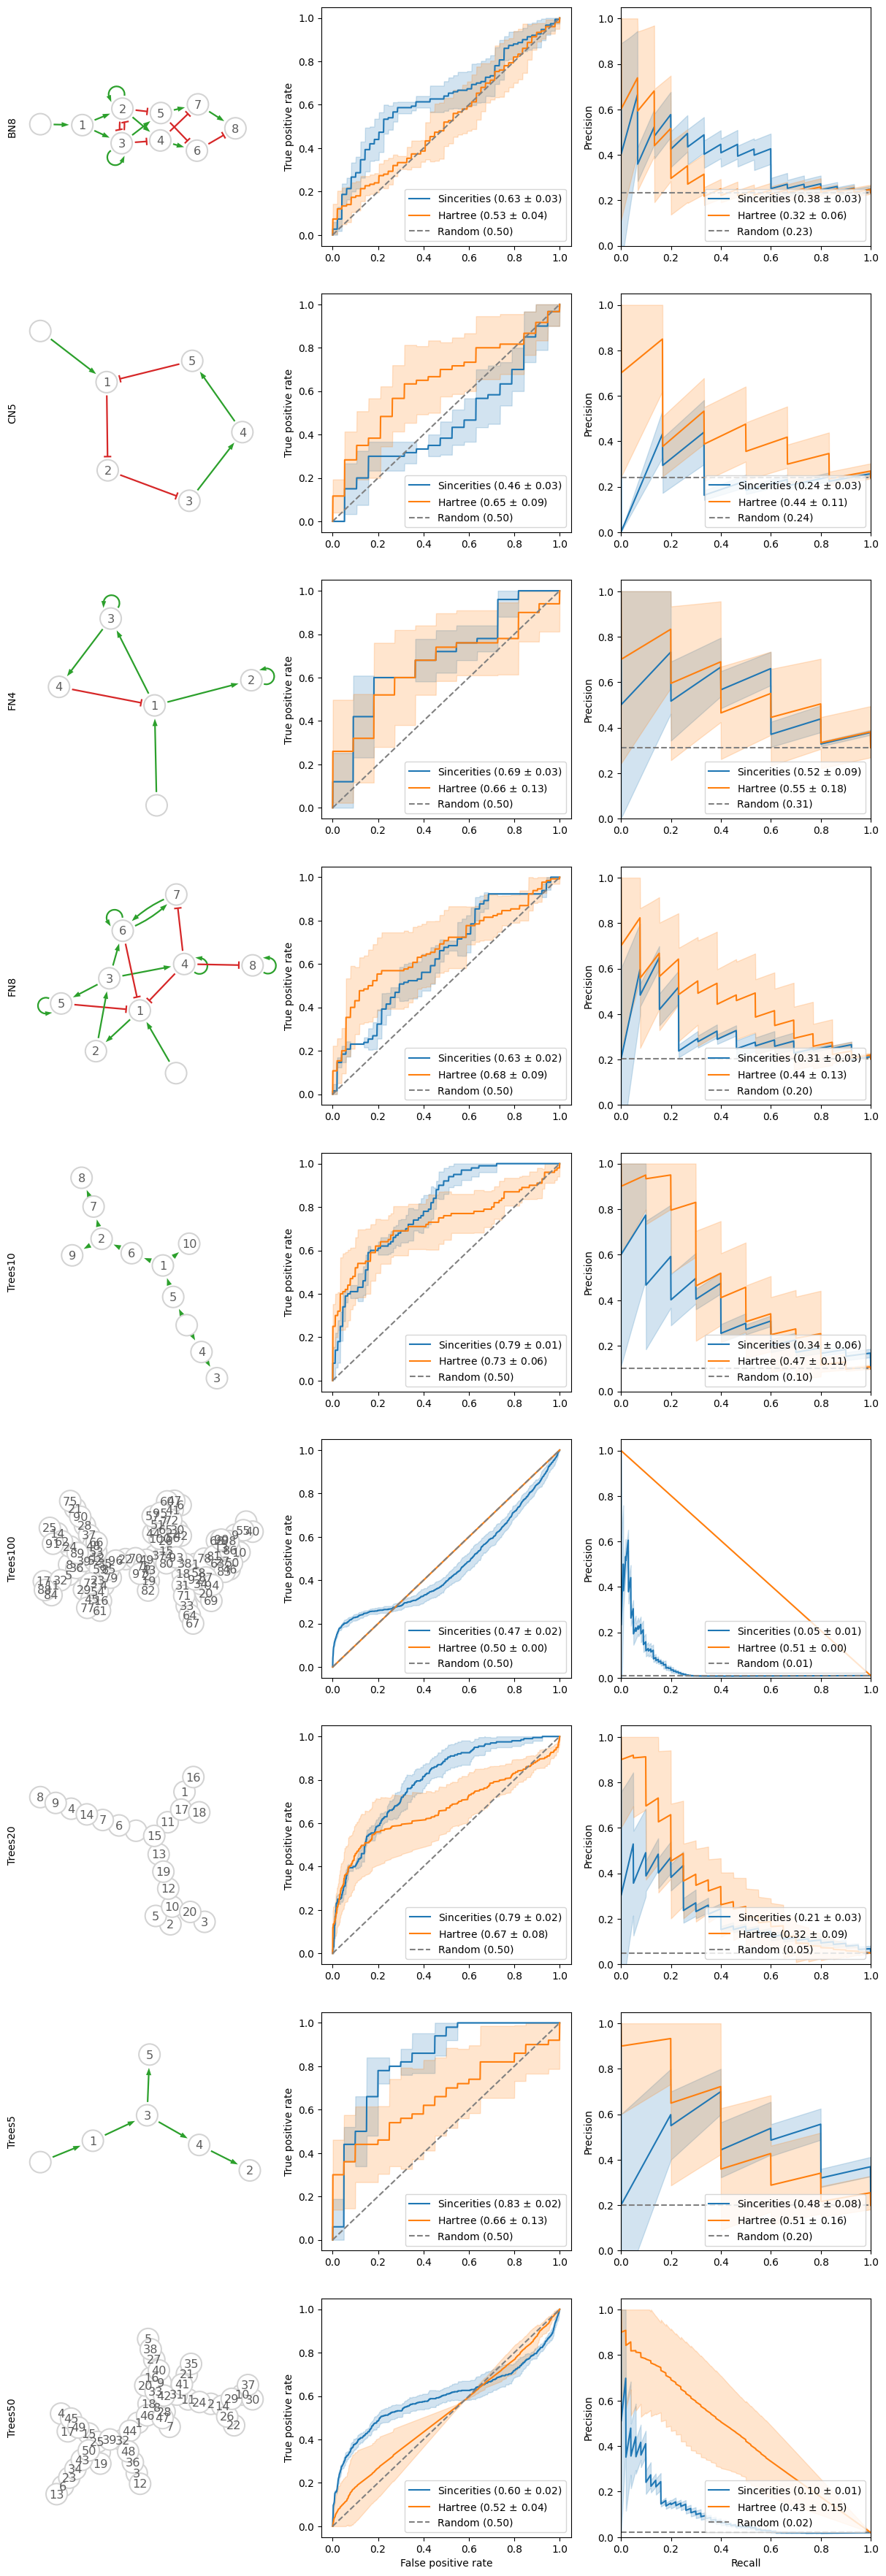

In [6]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

fig = plt.figure(figsize=(5*(2 + show_networks), 5*len(networks)), dpi=100)
grid = gs.GridSpec(nb_networks, 2 + show_networks)

for i, (net_name, network) in enumerate(networks.items()):
    plotter = InteractionPlotter(network)
    j = 0
    if show_networks:
        ax = fig.add_subplot(grid[i, j])
        plot_network(
            network.interaction, 
            networks_pos[i],
            axes=ax,
            scale=20
        )
        ax.set_ylabel(f'{net_name}')
        j = 1
    
    roc_ax = fig.add_subplot(grid[i, j+0])
    pr_ax = fig.add_subplot(grid[i, j+1]) 

    scores = gen.scores[net_name]
    plotter.plot_rocs(scores, roc_ax)
    plotter.plot_prs(scores, pr_ax)

    if i < nb_networks - 1:
        roc_ax.set_xlabel('')
        pr_ax.set_xlabel('')

fig.show(warn=False)
fig.savefig('figure_mean_curve.pdf')


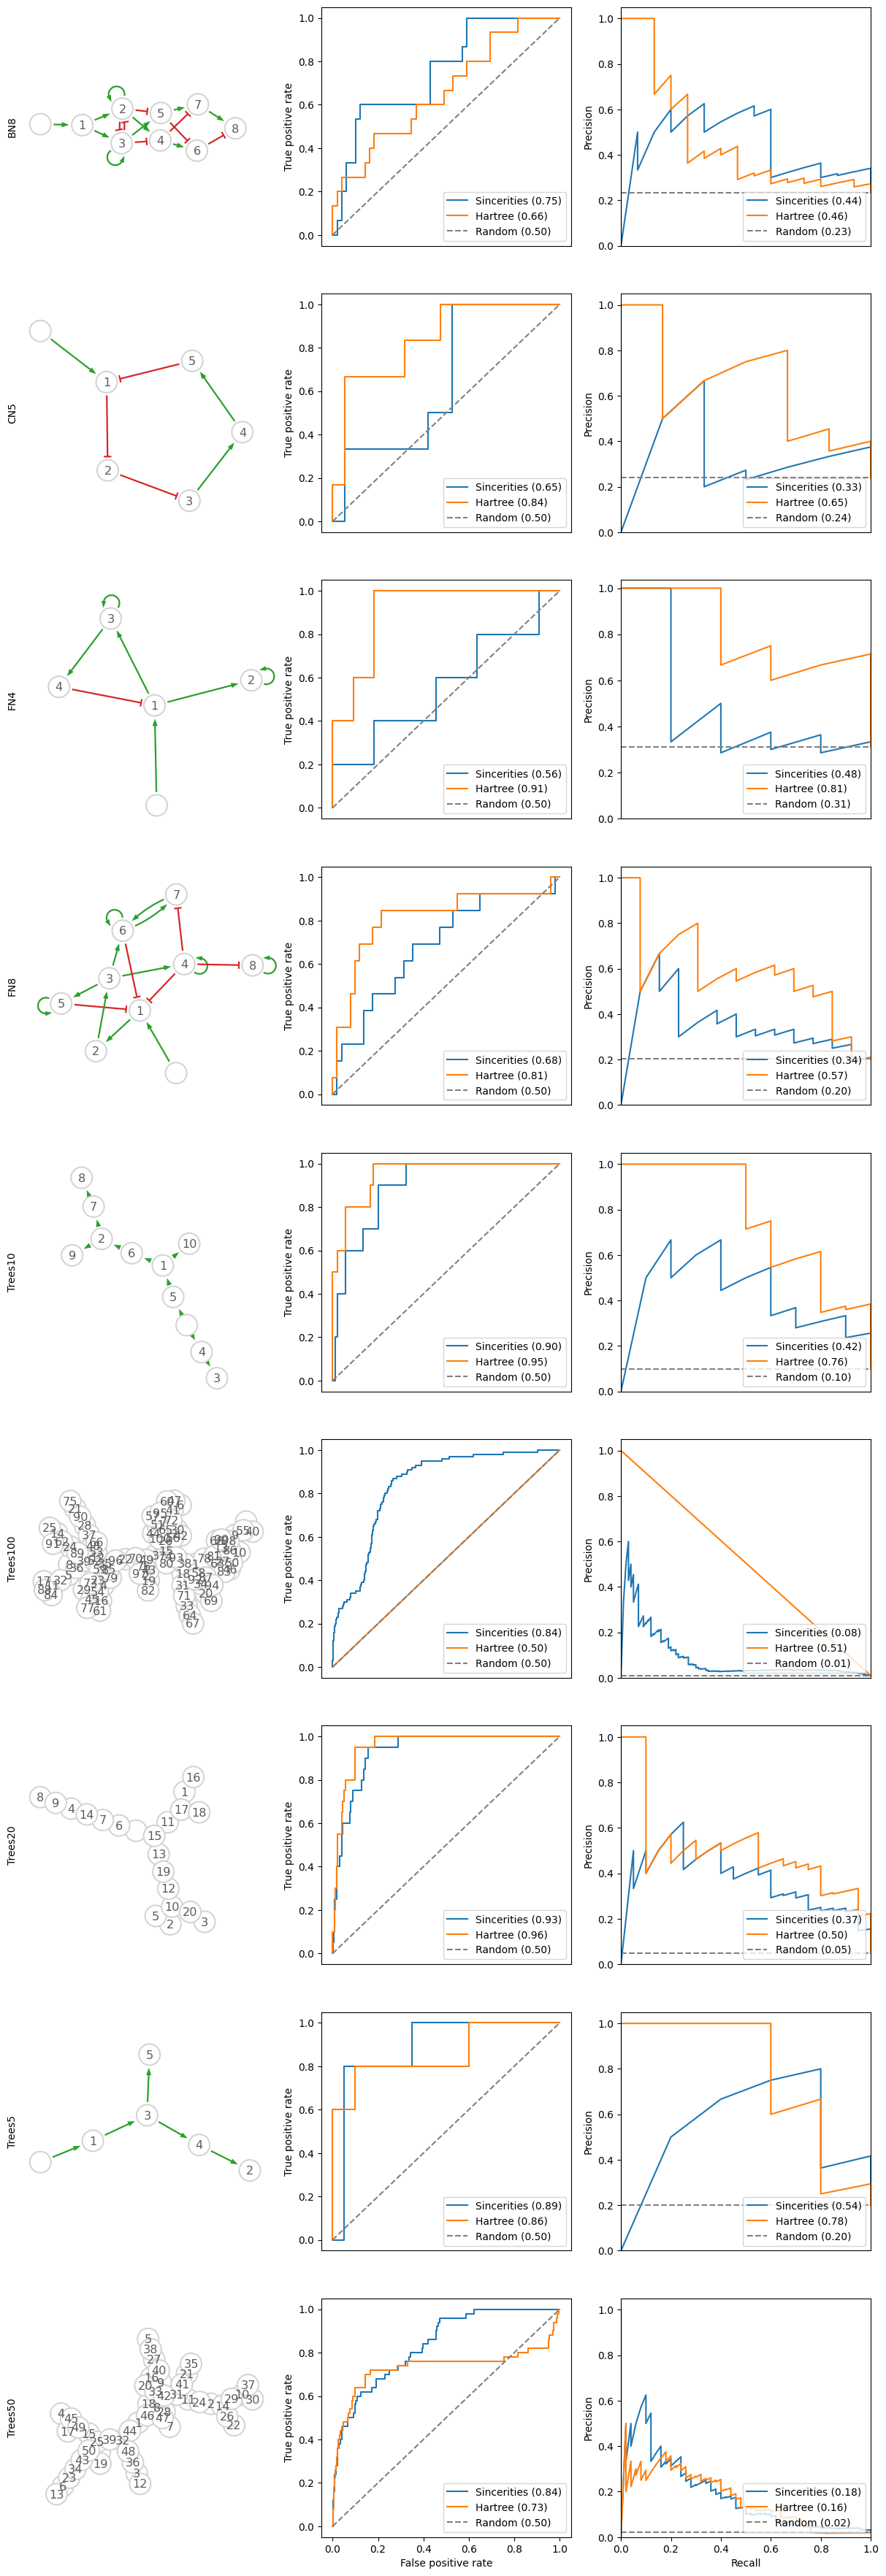

In [7]:
from itertools import accumulate
from harissa import NetworkParameter

fig = plt.figure(figsize=(5*(2 + show_networks), 5*len(networks)), dpi=100)
for i, (net_name, network) in enumerate(networks.items()):
    plotter = InteractionPlotter(network)
    mean_scores = {}
    for inf_name, (scores, runtimes) in gen.scores[net_name].items():
        mean_scores[inf_name] = (
            list(accumulate(
                scores,
                lambda s1, s2: (
                    s1.interaction if isinstance(s1, NetworkParameter) else s1
                ) + s2.interaction
            ))[-1] / len(scores), 
            np.mean(runtimes)
        )
    inters = {k:v for k, (v, _) in mean_scores.items()}
    j = 0
    if show_networks:
        ax = fig.add_subplot(grid[i, j])
        plot_network(
            network.interaction, 
            networks_pos[i],
            axes=ax,
            scale=20
        )
        ax.set_ylabel(f'{net_name}')
        j = 1
    roc_ax = fig.add_subplot(grid[i, j+0])
    pr_ax = fig.add_subplot(grid[i, j+1]) 

    plotter.plot_roc(inters, roc_ax)
    plotter.plot_pr(inters, pr_ax)

    if i < nb_networks - 1:
        roc_ax.get_xaxis().set_visible(False)
        pr_ax.get_xaxis().set_visible(False)

fig.show(warn=False)
fig.savefig('figure_mean_inter.pdf')

In [8]:
gen.save('datagen4')

Networks saved at /home/nseyler/Work/benchmark/datagen4/networks                                    
Saving datasets |▌                   | 🌶      2/90 [2%] in 0s (~0s, 196.7/s)                        
Saving datasets |███▌                |  🌶     16/90 [18%] in 0s (~0s, 219.0/s)                      
Saving datasets |█████▍              |   🌶    24/90 [27%] in 0s (~0s, 224.4/s)                      
Saving datasets |███████▌            |    🌶   34/90 [38%] in 0s (~0s, 228.1/s)                      
Saving datasets |████████████▎       |     🌶  55/90 [61%] in 0s (~0s, 248.2/s)                      
Saving datasets |█████████████▊      |      🌶 62/90 [69%] in 0s (~0s, 255.3/s)                      
Saving datasets |██████████████▋     |      🌶 66/90 [73%] in 0s (~0s, 252.1/s)                      
Saving datasets |███████████████▌    |     🌶  70/90 [78%] in 0s (~0s, 244.0/s)                      
Saving datasets |████████████████▋   |    🌶   75/90 [83%] in 0s (~0s, 234.5/s)             

PosixPath('datagen4/scores')